# Uso de diagramas de caja para diagnosticar valores atípicos

Los diagramas de caja son efectivas en juzgar si valores o resultados extremos deben ser clasificados como atípicos o no. También son útiles para compara conjuntos de datos distintos.

Los pasos necesarios para construir un diagrama de caja:

1. Encontrar la mediana del conjunto de datos
2. Calcular el percentil 25 y 75 del conjunto de datos
3. Dibujar una caja con una apropiada escala vertical para los datos con estos dos límites
4. Calcular el rango intercuartílico (iqr) como la diferencia de estos dos percentiles
5. Dibujar líneas, llamados *bigotes*, encima y debajo del cuadro que extienden una longitud máxima de 1.5 iqr, pero solo hasta el punto más grande (o más pequeño) que aún esté dentro de 1.5 iqr
6. Identifique cualquier dato más allá de los bigotes como valores atípicos representándolos como puntos

La implementación en Python sería de la siguiente manera:

In [2]:
import numpy as np

# Implementación del percentil
def pctile(x,pct):
    y = np.sort(x)
    n = len(y)
    mp = pct/100*(n-1)
    mp1 = int(mp)
    xp = (mp-mp1)*y[mp1]+(1-(mp-mp1))*y[mp1+1]
    return xp

x = np.array([11.4,10.5,9.3,14.6,8.4,7.9,7.3,9.7,8.6,8.7])
n = len(x)

x_median = np.median(x)

x25 = pctile(x, 25.)
x75 = pctile(x, 75.)

iqr = x75 - x25

xwhiskhimax = x75 + 1.5 * iqr
xwhisklomin = x25 - 1.5 * iqr

x_sorted = np.sort(x)

for i in range(n):
    if x_sorted[i] > xwhisklomin:
        xwhisklo = x_sorted[i]
        break

for i in reversed(range(n)):
    if x_sorted[i] < xwhiskhimax:
        xwhiskhi = x_sorted[i]
        break

In [3]:
# Resultados

print('Mediana: ' + str(x_median))
print('Percentil 25: ' + str(x25))
print('Percentil 75: ' + str(x75))
print('iqr: ' + str(iqr))
print('Bigote bajo: ' + str(xwhisklo))
print('Bigote alto: ' + str(xwhiskhi))

Mediana: 9.0
Percentil 25: 8.549999999999999
Percentil 75: 9.899999999999999
iqr: 1.3499999999999996
Bigote bajo: 7.3
Bigote alto: 11.4


Ahora estos datos podríamos meterlo a un graficador para obtener el resultado visual. Sin embargo, podemos usar la librería `matplotlib` (profundizaremos más en esta librería en capítulos siguientes) para obtener el diagrama de caja de un conjunto de datos de manera sencilla:

{'whiskers': [<matplotlib.lines.Line2D at 0x119450650>,
 'caps': [<matplotlib.lines.Line2D at 0x119467350>,
 'boxes': [<matplotlib.lines.Line2D at 0x1193a7ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x1194709d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x119471550>],
 'means': []}

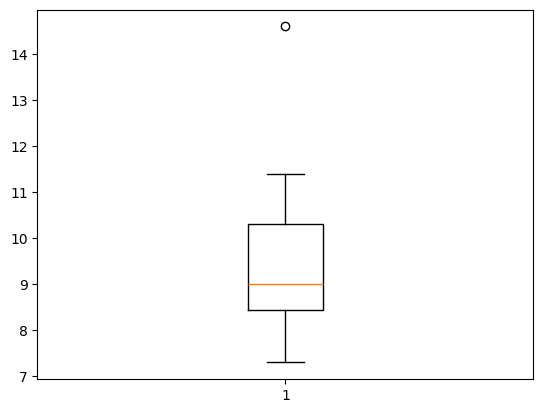

In [8]:
import matplotlib.pyplot as plt
plt.boxplot(x)

Observamos que hay un punto (el 14.6) muy separado del diagrama de caja. A este valor lo consideraremos como un *valor atípico*.